# Get the data from alpha_vantage API

API Documentation: https://www.alphavantage.co/documentation/

Python Module Package: https://github.com/RomelTorres/alpha_vantage

In [9]:
import pandas as pd
import datetime
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances

#You won't see my api key :D
with open ('private_info/alphavantage_api_key.txt', "r") as f:
    for line in f:
        for word in line.split():
            my_key = word 
av_api_key = my_key

ts = TimeSeries(key=av_api_key, output_format='pandas', indexing_type='date')
ts_data, ts_meta_data = ts.get_intraday(symbol='MSFT', interval='60min', outputsize='full')

ti = TechIndicators(key=av_api_key, output_format='pandas')
ti_data, ti_meta_data =  ti.get_macd(symbol='MSFT', interval='daily', fastperiod=12, slowperiod=26, signalperiod=9)

sp = SectorPerformances(key='av_api_key', output_format='pandas')
sp_data, sp_meta_data = sp.get_sector()

## Sector Performace Overview

In [16]:
sp_data.head(5)

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Communication Services,0.0028,0.0028,0.0389,-0.0739,-0.1356,-0.1643,-0.1643,-0.0834,-0.1083,0.2608
Consumer Discretionary,0.0109,0.0109,0.0584,-0.0845,-0.1670,-0.0049,-0.0049,0.2462,0.4802,3.6853
Consumer Staples,0.0040,0.0040,0.0115,-0.0946,-0.0595,-0.1115,-0.1115,-0.0044,0.1785,1.1333
Energy,0.0045,0.0045,0.0217,-0.1282,-0.2440,-0.2050,-0.2050,-0.0511,-0.3433,0.1116
Financials,0.0098,0.0098,0.0435,-0.1145,-0.1359,-0.1467,-0.1467,0.2194,0.3487,1.4127


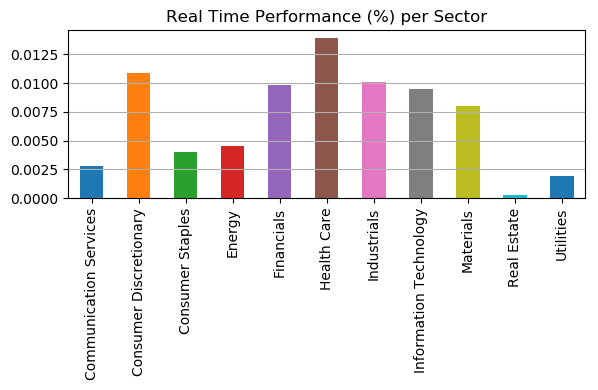

In [23]:
plt.figure(dpi=100)
sp_data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

##   Time Series Data

In [17]:
start_datetime = '2018-01-01 09:30:00'
mask = (ts_data.index > start_datetime)
ts_data = ts_data.loc[mask]
ts_data.head(5)
# Older data not available???

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2018-10-04 09:30:00,114.5600,114.71,113.23,113.3185,6177732.0
2018-10-04 10:30:00,113.2825,113.59,112.94,113.0700,4257899.0
2018-10-04 11:30:00,113.1000,113.22,112.36,112.5627,4210391.0
2018-10-04 12:30:00,112.5600,112.97,111.94,112.0150,4043826.0
2018-10-04 13:30:00,112.0200,112.11,111.63,112.1100,4070369.0


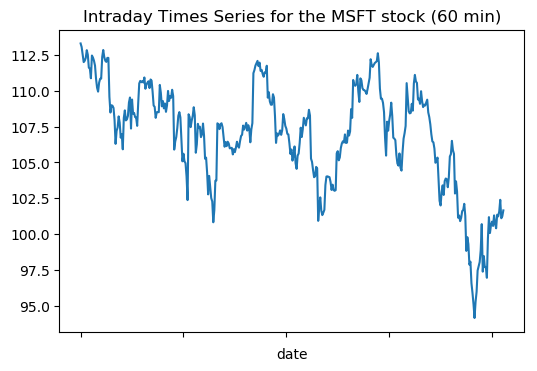

In [26]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
ts_data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (60 min)')
plt.show()

## Tech Indicator Data

In [31]:
start_date = '2018-01-01'
mask = (ti_data.index >= start_date)
ti_data = ti_data.loc[mask]
ti_data.head(5)

,MACD_Hist,MACD,MACD_Signal
date,,,
2018-01-02,-0.0767,0.7561,0.8327
2018-01-03,-0.0502,0.7700,0.8202
2018-01-04,0.0100,0.8327,0.8227
2018-01-05,0.1087,0.9585,0.8499
2018-01-08,0.1628,1.0534,0.8906


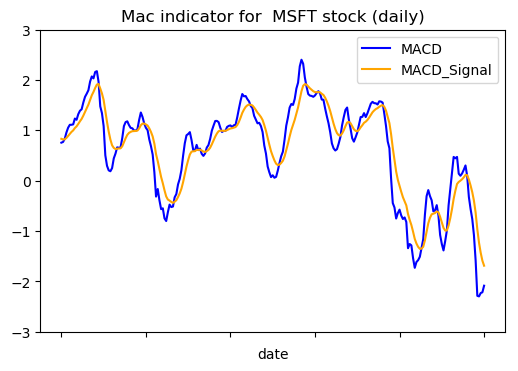

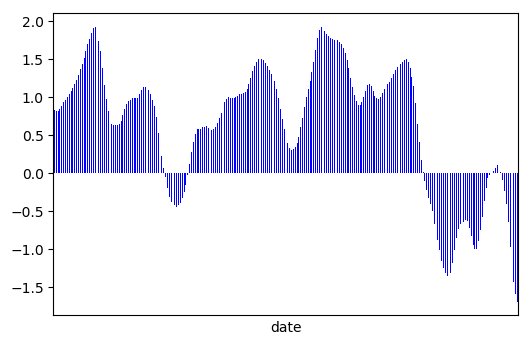

In [68]:
import matplotlib.dates as mdates

plt.figure(dpi=100)
ti_data['MACD'].plot(label='MACD', color='blue')
ti_data['MACD_Signal'].plot(label='MACD_Signal', color='orange')
plt.title('Mac indicator for  MSFT stock (daily)')
plt.ylim(-3,3)
plt.legend()
plt.show()

fig = plt.figure(dpi=100)
ti_data['MACD_Signal'].plot(label='MACD_Hist', color='blue', kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

**ToDO: Fix the data axis tick**